In [1]:
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import numpy as np

In [2]:
from algorithms.meshforrectangle import MeshForRectangle

In [3]:
rectangle = [[0,0],[0,2],[1,2],[1,0]]
u = lambda x, y: (x - 1)**2 * (y - 2)**2 *x*y

In [4]:
mesher = MeshForRectangle(10, 10)
triangulation = list(map(lambda t: t.get_points(), mesher.triangulate(rectangle)))

In [5]:
points = np.unique(np.concatenate(triangulation), axis=0).tolist()
triangles = list(map(lambda tri: [points.index(tri[0]),
                                  points.index(tri[1]),
                                  points.index(tri[2]),], triangulation))

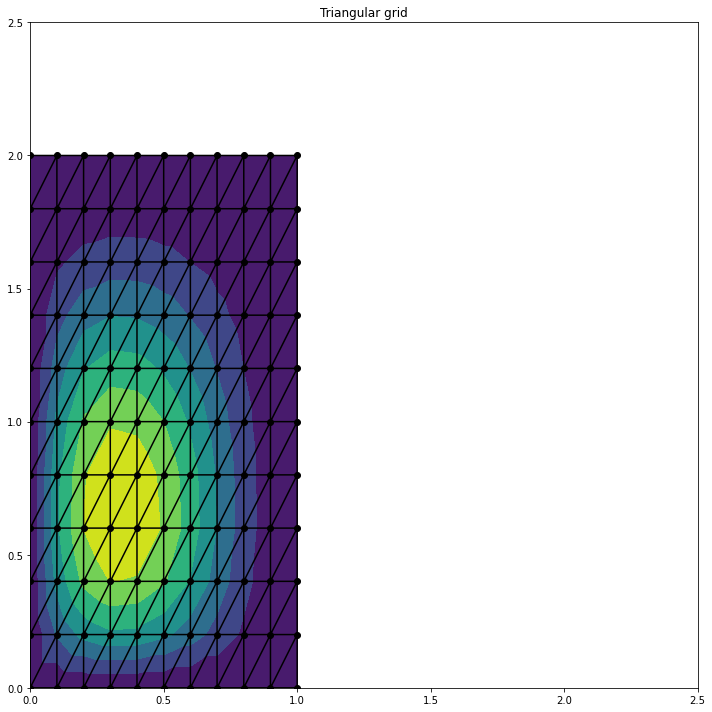

In [6]:
x, y = [l.ravel() for l in np.split(points, [-1], axis=1)]

triang = mtri.Triangulation(x, y, triangles)

# Interpolate to regularly-spaced quad grid.
z = u(x,y)
xi, yi = np.meshgrid(np.linspace(0, 3, 20), np.linspace(0, 3, 20))

# Set up the figure
fig, ax = plt.subplots(figsize=(10,10))#plt.subplots(nrows=2, ncols=2)

plt.xlim(0, 2.5)
plt.ylim(0, 2.5)

# Plot the triangulation.
ax.tricontourf(triang, z)
ax.triplot(triang, 'ko-')
ax.set_title('Triangular grid')

fig.tight_layout()
plt.show()